#Notebook for link prediciton analysis
##Coursework 2015, HSE - DataSci
###Sergey Korolev

####First attempt, similarity based algorithms

####Networks used:
1. UciNet data - http://vlado.fmf.uni-lj.si/pub/networks/data/UciNet/UciData.htm
2. Pajek datasets - http://vlado.fmf.uni-lj.si/pub/networks/data/default.htm
3. ND - http://www3.nd.edu/~networks/resources.htm (possibly already in pajek ds)
4. Alex Arenas - http://deim.urv.cat/~alexandre.arenas/data/welcome.htm
5. Stanford nets - http://snap.stanford.edu/data/

Really hope to sift through them or just write some interface to load them into networkx to work with them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [28]:
G = nx.karate_club_graph()

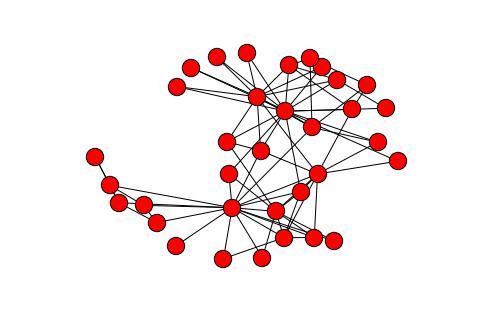

In [7]:
pos = nx.spring_layout(G)
nx.draw(G, pos)

In [22]:
import random
print(random.sample(G.edges(), len(G.edges())/10))

[(24, 25), (23, 29), (13, 33), (3, 13), (0, 13), (30, 32), (15, 33)]


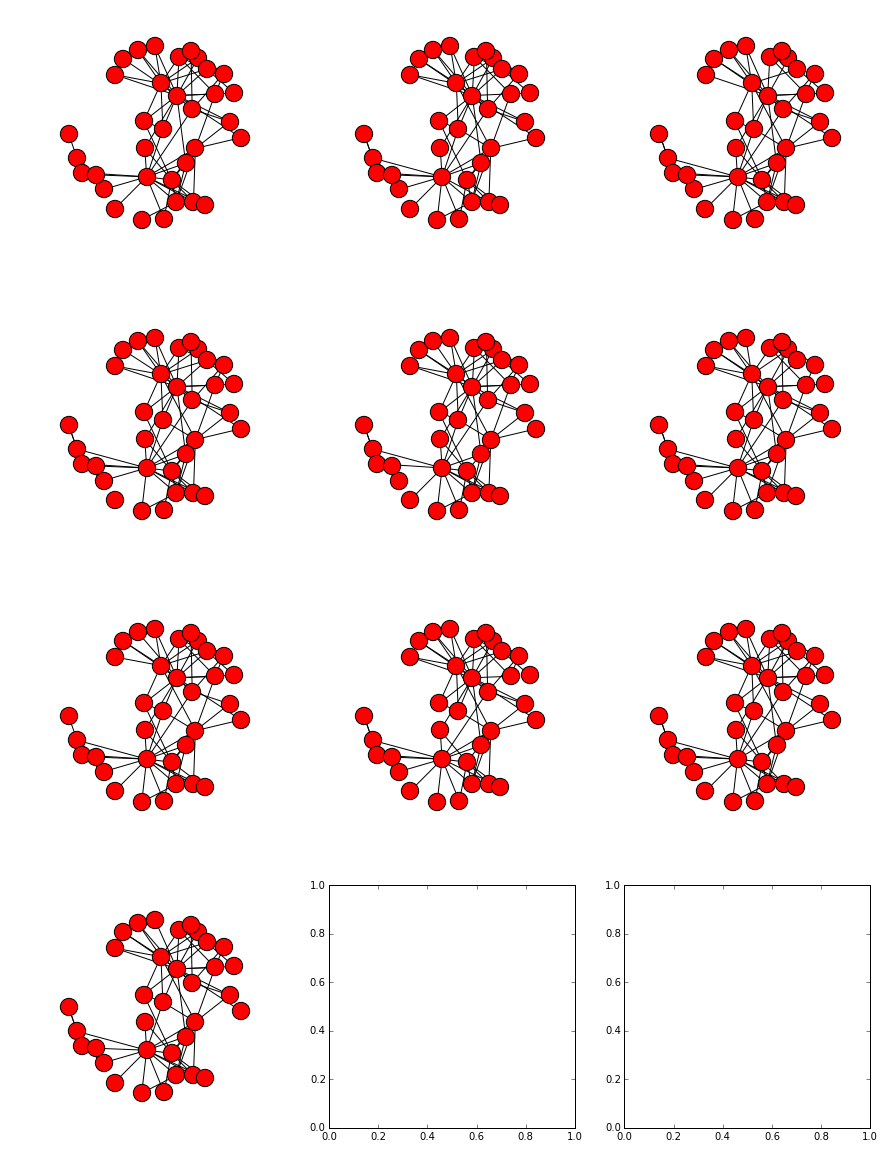

In [44]:
fig, axs = plt.subplots(4,3, figsize=(15, 20))
axs = axs.ravel()

def chunk(xs, n):
    ys = list(xs)
    random.shuffle(ys)
    size = len(ys) // n
    leftovers= ys[size*n:]
    for c in xrange(n):
        if leftovers:
           extra= [ leftovers.pop() ] 
        else:
           extra= []
        yield ys[c*size:(c+1)*size] + extra

folds = [i for i in chunk(G.edges(), 10)]
subs = []
for i in xrange(10):
    graph = G.copy()
    for c in folds[i]:
        graph.remove_edge(*c)
    nx.draw(graph, pos, ax = axs[i])
    subs.append(graph.copy())

In [84]:
def common_neighbours(subs, nmis, nfolds = 10):
    t = 0
    for i in subs:
        eds = []
        ee = []
        for a in i.nodes():
            for b in i.nodes()[a:]:
                if a != b and b not in i[a].keys() and a not in i[b].keys():
                    eds.append((len(sorted(nx.common_neighbors(i, a, b))), a, b))
        eds.sort(key=lambda x: x[0], reverse = True)
        for c in eds[0:nmis]:
            ee.append((c[1], c[2]))
        #print eds[0:nmis]
        print ee
        print folds[t]
        print set(folds[t]) & set(ee)
        t += 1
        

In [86]:
common_neighbours(subs, len(G.edges()) - len(subs[0].edges()))

[(2, 33), (7, 13), (0, 33), (1, 33), (13, 19), (0, 28), (0, 30), (0, 32)]
[(0, 12), (14, 32), (2, 8), (0, 5), (5, 16), (31, 33), (2, 32), (5, 6)]
set([])
[(0, 1), (0, 33), (2, 33), (7, 13), (0, 32), (4, 5), (6, 10), (8, 13)]
[(23, 25), (24, 27), (0, 1), (27, 33), (1, 19), (30, 32), (0, 17), (2, 28)]
set([(0, 1)])
[(2, 33), (0, 33), (7, 13), (0, 32), (1, 8), (2, 30), (2, 31), (4, 5)]
[(23, 32), (29, 33), (15, 32), (25, 31), (1, 21), (30, 33), (24, 25), (18, 32)]
set([])
[(2, 33), (0, 33), (0, 32), (1, 33), (2, 31), (3, 7), (7, 13), (8, 13)]
[(23, 27), (5, 10), (0, 11), (14, 33), (3, 7), (15, 33), (8, 30), (0, 21)]
set([(3, 7)])
[(2, 33), (0, 2), (0, 33), (7, 13), (1, 2), (1, 33), (8, 13), (13, 19)]
[(9, 33), (0, 2), (1, 2), (23, 29), (0, 10), (20, 33), (31, 32), (0, 4)]
set([(1, 2), (0, 2)])
[(2, 33), (0, 3), (0, 32), (0, 33), (1, 8), (1, 33), (2, 30), (2, 31)]
[(24, 31), (23, 33), (0, 3), (3, 13), (26, 29), (0, 19), (22, 33), (29, 32)]
set([(0, 3)])
[(2, 3), (2, 33), (0, 33), (1, 7), (